# OneSafety ML Model to predict abnormal worker's stress level

In [5]:
import pandas as pd
from sklearn import tree
import numpy as np
from scipy import interpolate
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics
from numpy import sqrt
from sklearn import naive_bayes
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.utils.multiclass import unique_labels
import data_pre_processing as dpp
from datetime import datetime
import time
import hrvanalysis as hrv
from collections import namedtuple

In [13]:
file = '/Users/smileyboy/OneSafety/Data/OneSafety Experiment/OneSafety_Session1/session1.csv'
df = pd.read_csv(file, sep=',',skiprows=1)
print(df)
df = df.drop('Shimmer_5E33_GSR_Range_CAL', axis=1)
df = df.drop('Shimmer_5E33_GSR_Skin_Resistance_CAL', axis=1)
df = df.drop('Shimmer_5E33_Pressure_BMP280_CAL', axis=1)
df = df.drop(df.index[0])
df.columns = ['time', 'x', 'y', 'z',
              'gsr', 'gx', 'gy', 'gz', 'ppg', 'temp','hr']

/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      Shimmer_5E33_Timestamp_Unix_CAL Shimmer_5E33_Accel_LN_X_CAL  \
0                                  ms                     m/(s^2)   
1               1.5740628371679688E12          2.9130434782608696   
2               1.5740628374285278E12          2.5543478260869565   
3               1.5740628374363403E12          2.5217391304347827   
4               1.5740628374441528E12          2.4891304347826084   
5               1.5740628374519653E12          2.5217391304347827   
6               1.5740628374597778E12          2.5652173913043477   
7               1.5740628374675903E12          2.6739130434782608   
8               1.5740628374754028E12           2.717391304347826   
9               1.5740628374832153E12          2.7282608695652173   
10              1.5740628374910278E12          2.6630434782608696   
11              1.5740628374988403E12           2.543478260869565   
12              1.5740628375066528E12          2.4130434782608696   
13              1.5740628375144653

ValueError: Length mismatch: Expected axis has 12 elements, new values have 11 elements

In [42]:
# Convert values from str to float
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['z'] = df['z'].astype(float)
df['gsr'] = df['gsr'].astype(float)
df['ppg'] = df['ppg'].astype(float)
df['temp'] = df['temp'].astype(float)
df['gx'] = df['gx'].astype(float)
df['gy'] = df['gy'].astype(float)
df['gz'] = df['gz'].astype(float)
df['time'] = df['time'].astype(float)
# Encode target class with 1==> Stressed / 0 ==> Not Stressed
df['target'] = 0
# Round data frame values to 2 decimls after '.'.
df = df.round(4)
# Clean the data from Nan ,missing and duplicate values
df = df.dropna(axis=0, how='any')
# Obtain columns names
cols = df.columns
for col in cols:
    if col == 'time':
        time = []
        fmt = "%Y-%m-%d %H:%M:%S"
        for t in df['time']:
            time.append(datetime.fromtimestamp(t/1000).strftime(fmt))
        df['time'] = time
    elif col == 'hr':
        df = df[df.hr > 0]
    elif col == 'gsr':
        df = df[df.gsr > 0.0]
for h in df['hr']:
    rr.append(int((60000 / h)))
    # This remove outliers from signal
    rr_without_outliers = hrv.remove_outliers(rr_intervals=rr, low_rri=300, high_rri=2000)
    # This replace outliers nan values with linear interpolation
    interpolated_rr_intervals = hrv.interpolate_nan_values(rr_intervals=rr_without_outliers,
                                                           interpolation_method="linear")
    rr = interpolated_rr_intervals
    # This remove ectopic beats from signal
    nn_intervals_list = hrv.remove_ectopic_beats(
        rr_intervals=interpolated_rr_intervals, method="malik")
    # This replace ectopic beats nan values with linear interpolation
    interpolated_nn_intervals = hrv.interpolate_nan_values(
        rr_intervals=nn_intervals_list)
    df['rr'] = interpolated_nn_intervals
    

ValueError: could not convert string to float: '2019-11-11 07:31:45'

In [ ]:
# Scaling data to 0-1 range
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df[df.columns.difference(['time'])])
print(X_train_minmax)
X_scaled = scale(df[df.columns.difference(['time'])])
print(X_scaled)

In [16]:
# Obtain RR interval list
rr=[1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 992, 992, 992, 992, 992, 992, 992, 992, 992, 992, 992, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 960, 960, 960, 960, 960, 960, 960, 960, 960, 937, 937, 937, 937, 937, 937, 937, 937, 937, 937, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 921, 921, 921, 921, 921, 921, 921, 921, 921, 921, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 992, 992, 992, 992, 992, 992, 992, 992, 992, 992, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 968, 968, 968, 968, 968, 968, 968, 968, 968, 968, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 937, 937, 937, 937, 937, 937, 937, 937, 937, 937, 945, 945, 945, 945, 945, 945, 945, 945, 945, 945, 968, 968, 968, 968, 968, 968, 968, 968, 968, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 937, 937, 937, 937, 937, 937, 937, 937, 937, 937, 937, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1062, 1062, 1062, 1062, 1062, 1062, 1062, 1062, 1062, 1062, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 1039, 992, 992, 992, 992, 992, 992, 992, 992, 992, 992, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 984, 984, 984, 984, 984, 984, 984, 984, 984, 984, 984, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1109, 1109, 1109, 1109, 1109, 1109, 1109, 1109, 1109, 1109, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1093, 1093, 1093, 1093, 1093, 1093, 1093, 1093, 1093, 1093, 1093, 1085, 1085, 1085, 1085, 1085, 1085, 1085, 1085, 1085, 1085, 1085, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1046, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1078, 1070, 1070, 1070, 1070, 1070, 1070, 1070, 1070, 1070, 1070, 992, 992, 992, 992, 992, 992, 992, 992, 992, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 929, 921, 921, 921, 921, 921, 921, 921, 921, 875, 875, 875, 875, 875, 875, 875, 875, 875, 843, 843, 843, 843, 843, 843, 843, 843, 843, 867, 867, 867, 867, 867, 867, 867, 859, 859, 859, 859, 859, 859, 859, 859, 789, 789, 789, 789, 789, 789, 789, 789, 679, 679, 679, 679, 679, 679, 679, 750, 750, 750, 750, 750, 750, 750, 640, 640, 640, 640, 640, 640, 640, 640, 632, 632, 632, 632, 632, 632, 632, 710, 710, 710, 710, 710, 710, 710, 710, 734, 734, 734, 734, 734, 734, 734, 734, 781, 781, 781, 781, 781, 781, 781, 789, 789, 789, 789, 789, 789, 789, 789, 789, 781, 781, 781, 781, 781, 781, 781, 781, 781, 859, 859, 859, 859, 859, 859, 859, 859, 882, 882, 882, 882, 882, 882, 882, 882, 859, 859, 859, 859, 859, 859, 859, 859, 859, 804, 804, 804, 804, 804, 804, 804, 804, 804, 835, 835, 835, 835, 835, 835, 835, 835, 835, 914, 914, 914, 914, 914, 914, 914, 914, 890, 890, 890, 890, 890, 890, 890, 890, 890, 859, 859, 859, 859, 859, 859, 859, 859, 859, 882, 882, 882, 882, 882, 882, 882, 882, 867, 867, 867, 867, 867, 867, 867, 867, 867, 835, 835, 835, 835, 835, 835, 835, 835, 835, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 859, 882, 882, 882, 882, 882, 882, 882, 882, 851, 851, 851, 851, 851, 851, 851, 851, 851, 828, 828, 828, 828, 828, 828, 828, 828, 851, 851, 851, 851, 851, 851, 851, 851, 851, 867, 867, 867, 867, 867, 867, 867, 867, 828, 828, 828, 828, 828, 828, 828, 828, 828, 851, 851, 851, 851, 851, 851, 851, 851, 851, 867, 867, 867, 867, 867, 867, 867, 867, 921, 921, 921, 921, 921, 921, 921, 921, 921, 828, 828, 828, 828, 828, 828, 828, 828, 828, 843, 843, 843, 843, 843, 843, 843, 843, 906, 906, 906, 906, 906, 906, 906, 906, 843, 843, 843, 843, 843, 843, 843, 843, 843, 812, 812, 812, 812, 812, 812, 812, 812, 828, 828, 828, 828, 828, 828, 828, 828, 843, 843, 843, 843, 843, 843, 843, 843, 843, 835, 835, 835, 835, 835, 835, 835, 835, 828, 828, 828, 828, 828, 828, 828, 828, 828, 843, 843, 843, 843, 843, 843, 843, 843, 867, 867, 867, 867, 867, 867, 867, 867, 828, 828, 828, 828, 828, 828, 828, 828, 828, 835, 835, 835, 835, 835, 835, 835, 835, 828, 828, 828, 828, 828, 828, 828, 828, 843, 843, 843, 843, 843, 843, 843, 843, 843, 812, 812, 812, 812, 812, 812, 812, 812, 812, 851, 851, 851, 851, 851, 851, 851, 867, 867, 867, 867, 867, 867, 867, 867, 867, 796, 796, 796, 796, 796, 796, 796, 796, 796, 875, 875, 875, 875, 875, 875, 875, 875, 875, 851, 851, 851, 851, 851, 851, 851, 851, 906, 906, 906, 906, 906, 906, 906, 906, 851, 851, 851, 851, 851, 851, 851, 851, 742, 742, 742, 742, 742, 742]
df=pd.DataFrame({'rr': rr})

In [30]:
print(hrv.get_frequency_domain_features(df['rr'].loc[0:1].tolist()).get('lf'))

41.356554904918774


/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg = 108
  .format(nperseg, input_length))


In [28]:
'''
Define HRV Variables
'''
mean_rr = sdnn = sdsd = nni_50 = pnni_50 = nni_20 = pnni_20 = rmssd = mednn = range_rr = mean_hr = max_hr = min_hr = sd_hr = 0
lf = []

# lf=hf=lf_hf= lfnu= hfnu= total_power= vlf = 0

sampling_frequency = 7
interpolation_method="linear"
# Named Tuple for different frequency bands
VlfBand = namedtuple("Vlf_band", ["low", "high"])
LfBand = namedtuple("Lf_band", ["low", "high"])
HfBand = namedtuple("Hf_band", ["low", "high"])
vlf_band = VlfBand(0.0033, 0.04)
hf_band = HfBand(0.15, 0.40)

for i in range(0, len(df['rr'])):
    nn=df['rr'].loc[0:i+1].tolist()
    timestamps= (np.cumsum(nn) / 1000)
    timestamps= timestamps- timestamps[0]
    # ---------- Interpolation of signal ---------- # 
    funct=interpolate.interp1d(x = timestamps, y = nn, kind = interpolation_method)
    timestamps_interpolation = np.arange(0, timestamps[-1], 1 / float(sampling_frequency))
    nni_interpolation=funct(timestamps_interpolation)
    # ---------- Remove DC Component ---------- #
    nni_normalized=nni_interpolation - np.mean(nni_interpolation)
    #  ----------  Compute Power Spectral Density  ---------- #
    freq, psd=signal.welch(x = nni_normalized, fs = sampling_frequency, window = 'hann',nfft = 4096)

print(lf)
exit(0)
df['mean_nn']=df['hr'].ewm(span = 40, adjust = False).mean()
df['sdnn']=df['hr'].ewm(span = 40, adjust = False).std()
df['sdsd']=df['diff'].ewm(span = 40, adjust = False).std()
df['nni_50']=(df['diff'].abs() > 50).expanding(1).sum()
df['pnni_50']=(100 * df['nni_50']) / len(df['rr'])
df['nni_20']=(df['diff'].abs() > 20).expanding(1).sum()
df['pnni_20']=(100 * df['nni_20']) / len(df['rr'])
df['rmssd']=np.sqrt((df['diff']**2).ewm(span=40, adjust=False).mean())
df['med_nn']=df['rr'].expanding(1).median()
df['mean_hr']=df['hr'].ewm(span = 40, adjust = False).mean()
df['sd_hr']=df['hr'].ewm(span = 40, adjust = False).std()
df['max_hr']=df['hr'].expanding(1).max()
df['min_hr']=df['hr'].expanding(1).min()
df['range_rr']=df['rr'].expanding(1).max()-df['rr'].expanding(1).min()

print(df['lf'])

/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 8, using nperseg = 8
  .format(nperseg, input_length))
/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 15, using nperseg = 15
  .format(nperseg, input_length))
/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 22, using nperseg = 22
  .format(nperseg, input_length))
/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 256 is greater than input length  = 29, using nperseg = 29
  .format(nperseg, input_length))
/Users/smileyboy/PycharmProjects/OneSafety/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: Use

[]


KeyError: 'hr'

In [1]:
lf = []
for i in range(0, len(df['rr'])):
    nn=rr[i:i+10]
    lf.append(hrv.get_frequency_domain_features(nn).get('lf'))
print(lf)


NameError: name 'df' is not defined

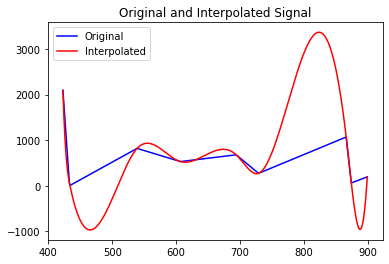

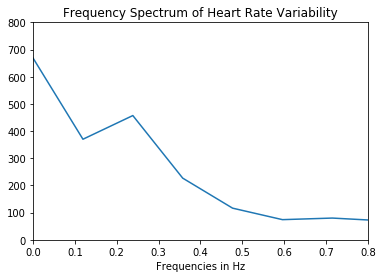

LF: 0.0
HF: 513.6647761459591
{'lf': 233.86220806092606, 'hf': 34.81001363770272, 'lf_hf_ratio': 6.718245229517232, 'lfnu': 87.04368713013089, 'hfnu': 12.956312869869112, 'total_power': 616.1930702959079, 'vlf': 347.5208485972791}


In [72]:
import heartpy as hp
import numpy as np
import hrvanalysis as hrv
from scipy.interpolate import UnivariateSpline
from scipy.signal import welch, periodogram
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
wd, m = hp.process(df['rr'], 128.0)
peaklist = wd['peaklist']
rr_list = wd['RR_list']
rr_x = peaklist[1:]
rr_y = rr_list
rr_x_new = np.linspace(rr_x[0], rr_x[-1], rr_x[-1])
f = interp1d(rr_x, rr_y, kind='cubic')
plt.title("Original and Interpolated Signal")
plt.plot(rr_x, rr_y, label="Original", color='blue')
plt.plot(rr_x_new, f(rr_x_new), label="Interpolated", color='red')
plt.legend()
plt.show()

# Set variables
n = len(df['rr'])  # Length of the signal
fs = 128
frq = np.fft.fftfreq(len(df['rr']), d=((1/fs)))
# divide the bins into frequency categories
frq = frq[range(int((n/2)))]


# Do FFT
Y = np.fft.fft(f(rr_x_new))/n  # Calculate FFT
Y = Y[range(int((n/2)))]  # Return one side of the FFT

# Plot
plt.title("Frequency Spectrum of Heart Rate Variability")
# Limit X axis to frequencies of interest (0-0.6Hz for visibility, we are interested in 0.04-0.5)
plt.xlim(0, 0.8)
plt.ylim(0, 800)  # Limit Y axis for visibility
plt.plot(frq, abs(Y))  # Plot it
plt.xlabel("Frequencies in Hz")
plt.show()
# Slice frequency spectrum where x is between 0.04 and 0.15Hz (LF), and use NumPy's trapezoidal integration function to find the area
lf = np.trapz(abs(Y[(frq >= 0.04) & (frq <= 0.15)]))
print("LF:", lf)
# Do the same for 0.16-0.5Hz (HF)
hf = np.trapz(abs(Y[(frq >= 0.16) & (frq <= 0.5)]))
print("HF:",hf)
print(hrv.get_frequency_domain_features(rr))

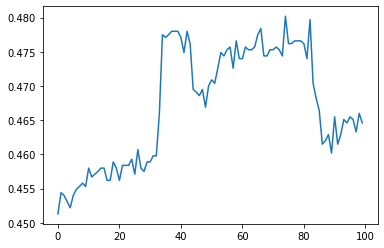

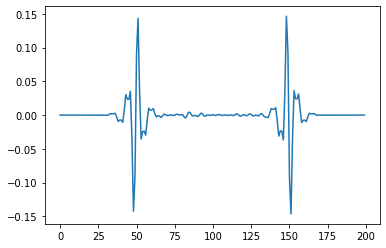

In [35]:
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
from scipy import signal
import peakutils

temp =df['gsr'].iloc[:100]
plt.plot(list(range(len(list(temp)))),list(temp))
plt.show()

fL = 0.1
fH = 0.3
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)

# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)

# high-pass filter 
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[int((N - 1) / 2)] += 1

h = np.convolve(hlpf, hhpf)
s = list(temp)
new_signal = np.convolve(s, h)


plt.plot(list(range(len(new_signal))),new_signal)
plt.show()


In [53]:
print(datetime.strptime(df['time'][1], '%Y-%m-%d %H:%M:%S'))

ValueError: time data '2019-11-11 07:31:45' does not match format '%M:%S'